# Extra Boosting MSE dataset — ExtraBoost demo

Trains the Go ExtraBoost model via the Python bridge using the pre-generated static features. Static features: f₁–f₃, extra features: e₁–e₄, target: y. Train/test split is defined by the time coordinate (t < 0.5 → train).

# Imports

In [78]:
from pathlib import Path
import sys

import importlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import json
import tempfile

%matplotlib inline

pd.set_option('display.max_rows', None)
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')
pd.reset_option('display.expand_frame_repr')


# import AI magic

In [27]:
%load_ext jupyter_ai_magics

# Paths

In [11]:
NB_DIR = Path.cwd().resolve()
REPO_ROOT = NB_DIR.parent.parent
PYTHON_PATH = REPO_ROOT / 'python'
if str(PYTHON_PATH) not in sys.path:
    sys.path.insert(0, str(PYTHON_PATH))

# Import Extra Boost

In [21]:
from extra_boost_py import bridge as _bridge_module
from extra_boost_py import booster as _booster_module
importlib.reload(_bridge_module)
importlib.reload(_booster_module)
from extra_boost_py import BoosterParams, ExtraBooster
from extra_boost_py.go_lib import build_shared

# Import dataset

In [22]:
DATA_PATH = Path('../../datasets/mse/extra_boosting_static_features_k50.csv')
if not DATA_PATH.exists():
    raise FileNotFoundError(f'Dataset not found at {DATA_PATH}')

df = pd.read_csv(DATA_PATH)
df.head()

,f_1,f_2,f_3,e_1,e_2,e_3,e_4,t,y
0,0,0,0,1.0,0.000000,0.000000,1.000000,0.000000,0.120065
1,0,0,0,1.0,0.004567,0.226376,0.974040,0.004567,0.099342
2,0,0,0,1.0,0.013218,0.613829,0.789439,0.013218,0.065454
3,0,0,0,1.0,0.049984,0.599095,-0.800678,0.049984,0.084479
4,0,0,0,1.0,0.145083,0.825440,0.564490,0.145083,0.047087


In [23]:
df.describe()

,f_1,f_2,f_3,e_1,e_2,e_3,e_4,t,y
count,248.000000,248.000000,248.000000,248.0,248.000000,248.000000,248.000000,248.000000,248.000000
mean,0.354839,0.407258,0.471774,1.0,0.522252,-0.083029,-0.078658,0.522252,0.151445
std,0.479432,0.492317,0.500212,0.0,0.254254,0.674144,0.732424,0.254254,0.075823
min,0.000000,0.000000,0.000000,1.0,0.000000,-0.999966,-0.999987,0.000000,-0.002028
25%,0.000000,0.000000,0.000000,1.0,0.359188,-0.720606,-0.805880,0.359188,0.091071
50%,0.000000,0.000000,0.000000,1.0,0.523444,-0.134904,-0.148451,0.523444,0.149314
75%,1.000000,1.000000,1.000000,1.0,0.726256,0.489335,0.676434,0.726256,0.218852
max,1.000000,1.000000,1.000000,1.0,1.000000,0.999952,1.000000,1.000000,0.287058


# EDA

In [35]:
%%ai chatgpt --format code
df.groupby(['f_1', 'f_2', 'f_3']).size().reset_index(name='count') - sort by f_1 f_2 f_3

In [36]:
df.groupby(['f_1', 'f_2', 'f_3']).size().reset_index(name='count').sort_values(['f_1', 'f_2', 'f_3'])

,f_1,f_2,f_3,count
0,0,0,0,50
1,0,0,1,47
2,0,1,0,34
3,0,1,1,29
4,1,0,0,27
5,1,0,1,23
6,1,1,0,20
7,1,1,1,18


* there are 8 groups in the dataset which can be identified by combination of f_1, f_2, f_3 variables 

In [37]:
%%ai chatgpt --format code
plot scatter y(t) for f_1 f_2 f_3 = 0 0 0 

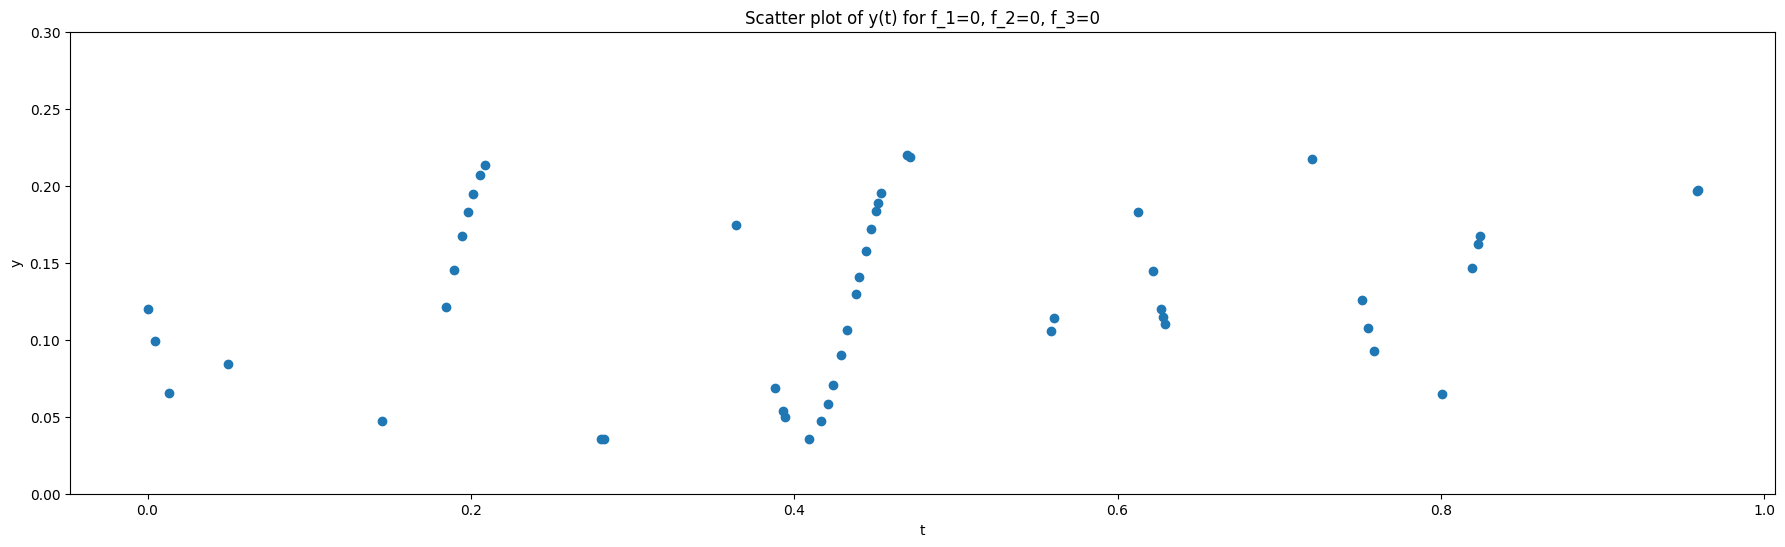

In [40]:
filtered_data = df[(df['f_1'] == 0) & (df['f_2'] == 0) & (df['f_3'] == 0)]
plt.figure(figsize=(22, 6))
plt.scatter(filtered_data['t'], filtered_data['y'])
plt.xlabel('t')
plt.ylabel('y')
plt.ylim(0, 0.3)
plt.title('Scatter plot of y(t) for f_1=0, f_2=0, f_3=0')
plt.show()

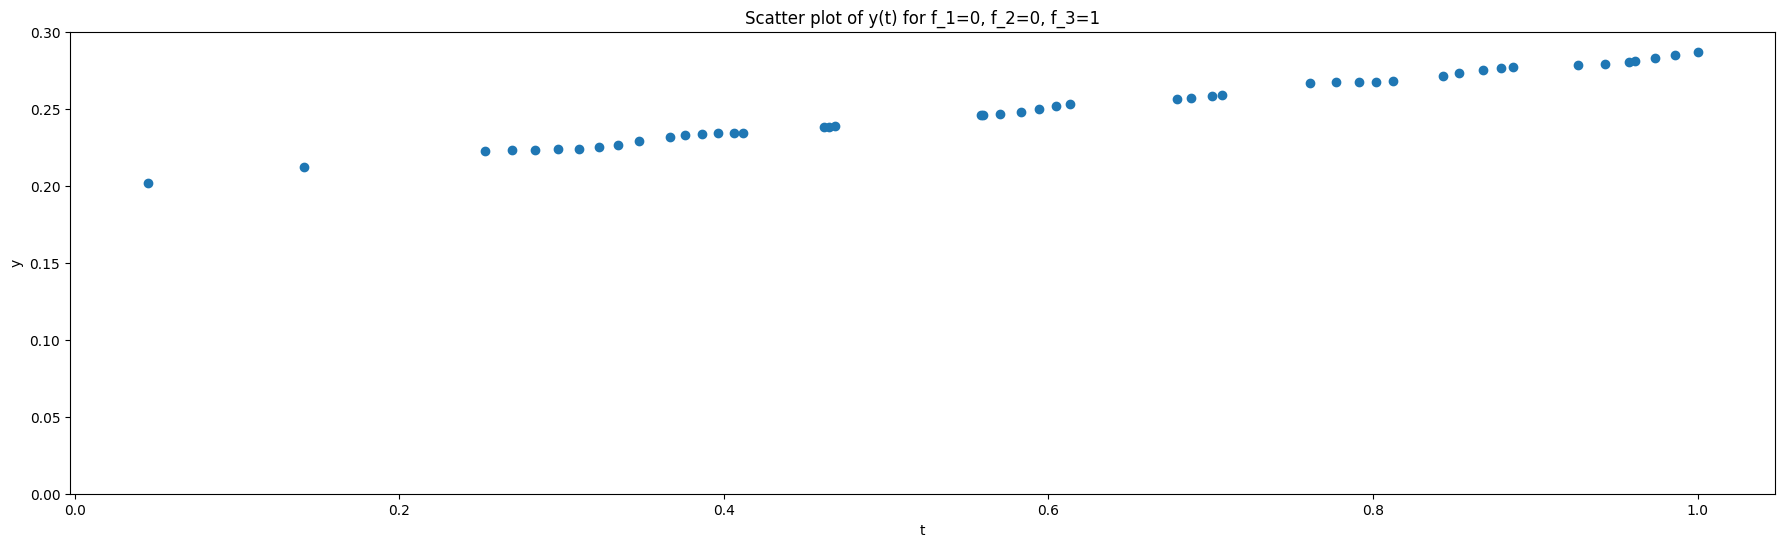

In [43]:
filtered_data = df[(df['f_1'] == 0) & (df['f_2'] == 0) & (df['f_3'] == 1)]
plt.figure(figsize=(22, 6))
plt.scatter(filtered_data['t'], filtered_data['y'])
plt.xlabel('t')
plt.ylabel('y')
plt.ylim(0, 0.3)
plt.title('Scatter plot of y(t) for f_1=0, f_2=0, f_3=1')
plt.show()

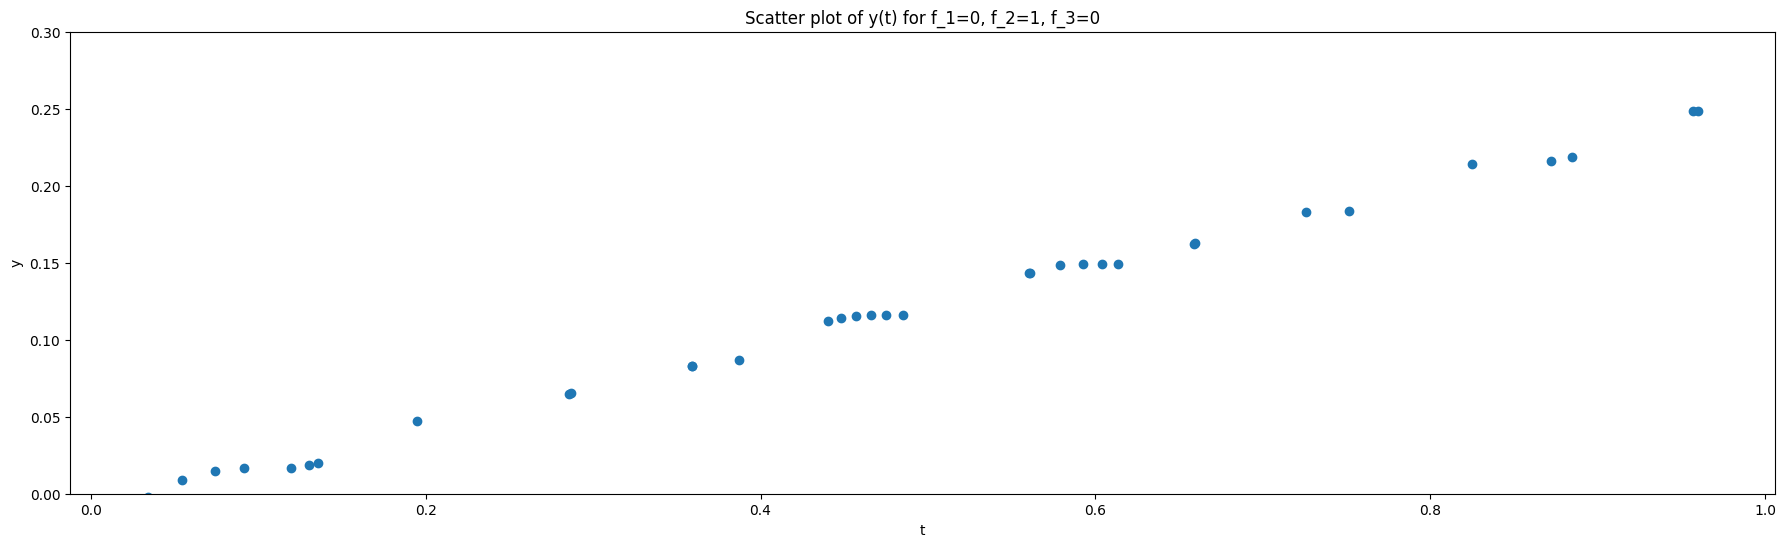

In [44]:
filtered_data = df[(df['f_1'] == 0) & (df['f_2'] == 1) & (df['f_3'] == 0)]
plt.figure(figsize=(22, 6))
plt.scatter(filtered_data['t'], filtered_data['y'])
plt.xlabel('t')
plt.ylabel('y')
plt.ylim(0, 0.3)
plt.title('Scatter plot of y(t) for f_1=0, f_2=1, f_3=0')
plt.show()

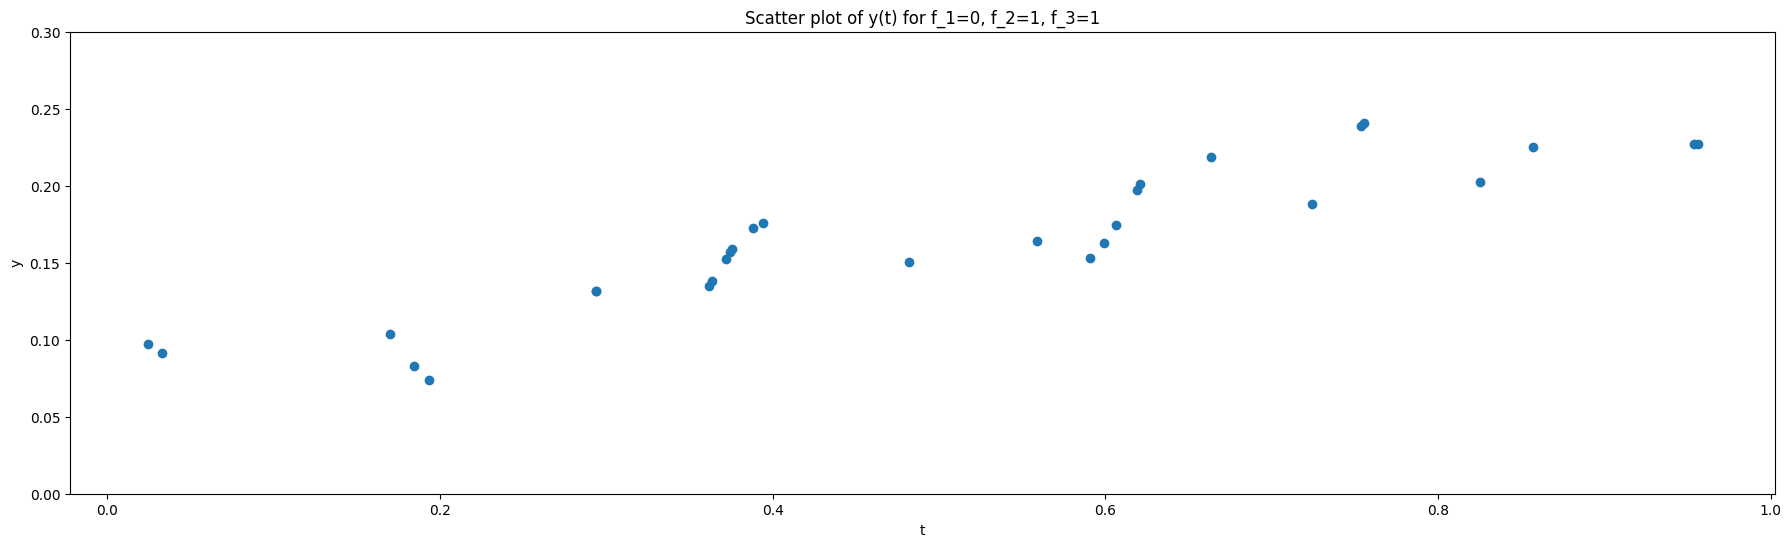

In [45]:
filtered_data = df[(df['f_1'] == 0) & (df['f_2'] == 1) & (df['f_3'] == 1)]
plt.figure(figsize=(22, 6))
plt.scatter(filtered_data['t'], filtered_data['y'])
plt.xlabel('t')
plt.ylabel('y')
plt.ylim(0, 0.3)
plt.title('Scatter plot of y(t) for f_1=0, f_2=1, f_3=1')
plt.show()

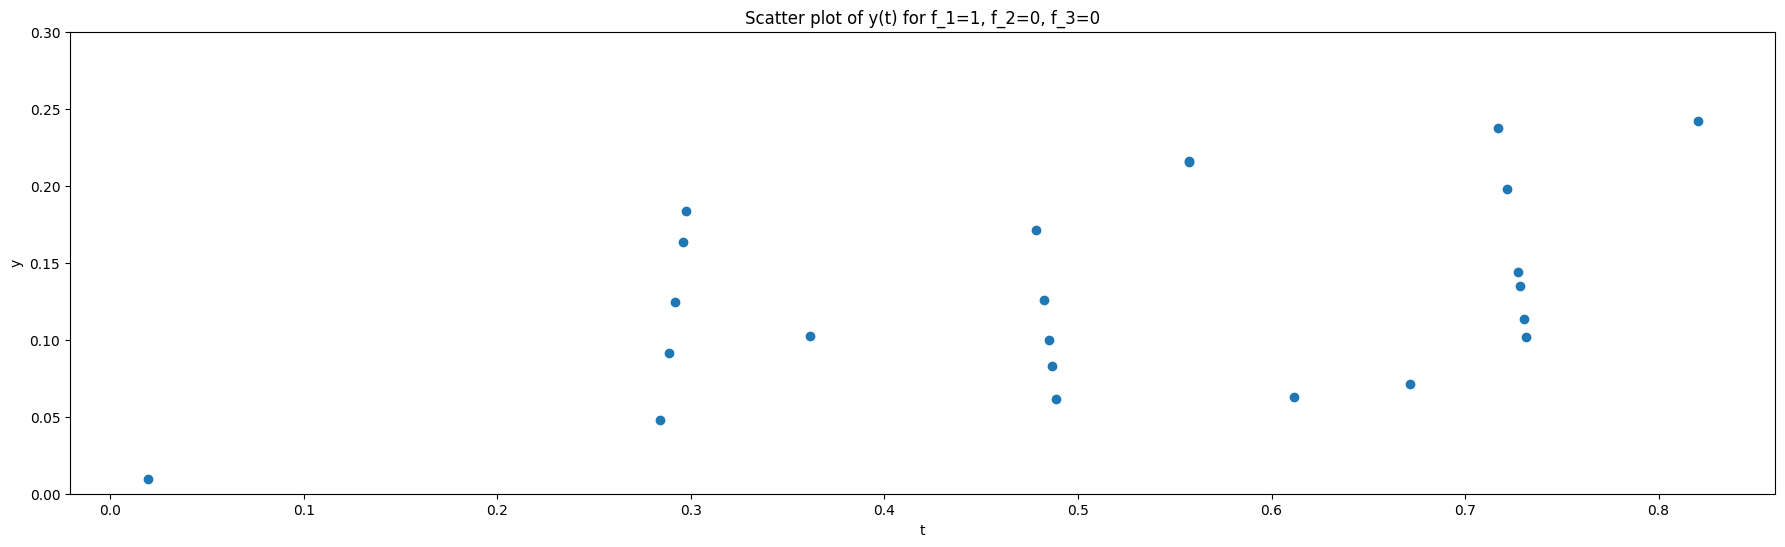

In [46]:
filtered_data = df[(df['f_1'] == 1) & (df['f_2'] == 0) & (df['f_3'] == 1)]
plt.figure(figsize=(22, 6))
plt.scatter(filtered_data['t'], filtered_data['y'])
plt.xlabel('t')
plt.ylabel('y')
plt.ylim(0, 0.3)
plt.title('Scatter plot of y(t) for f_1=1, f_2=0, f_3=0')
plt.show()

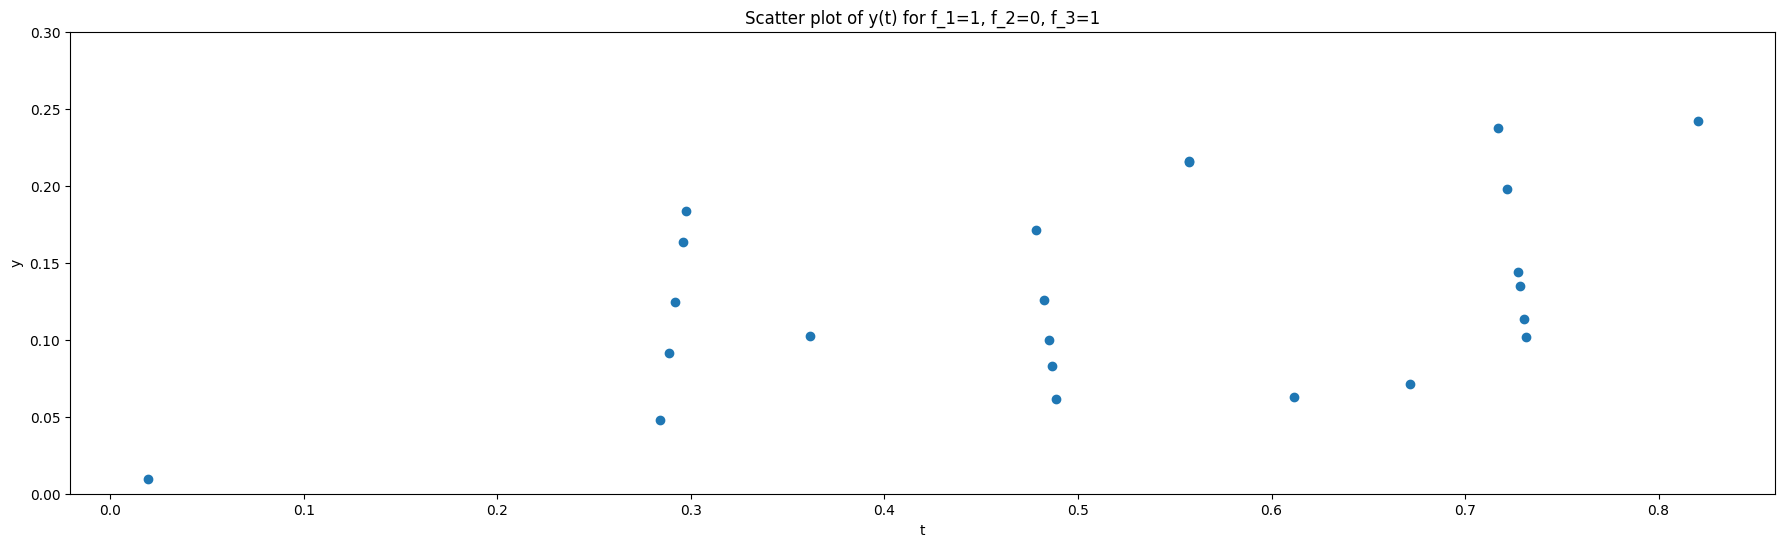

In [47]:
filtered_data = df[(df['f_1'] == 1) & (df['f_2'] == 0) & (df['f_3'] == 1)]
plt.figure(figsize=(22, 6))
plt.scatter(filtered_data['t'], filtered_data['y'])
plt.xlabel('t')
plt.ylabel('y')
plt.ylim(0, 0.3)
plt.title('Scatter plot of y(t) for f_1=1, f_2=0, f_3=1')
plt.show()

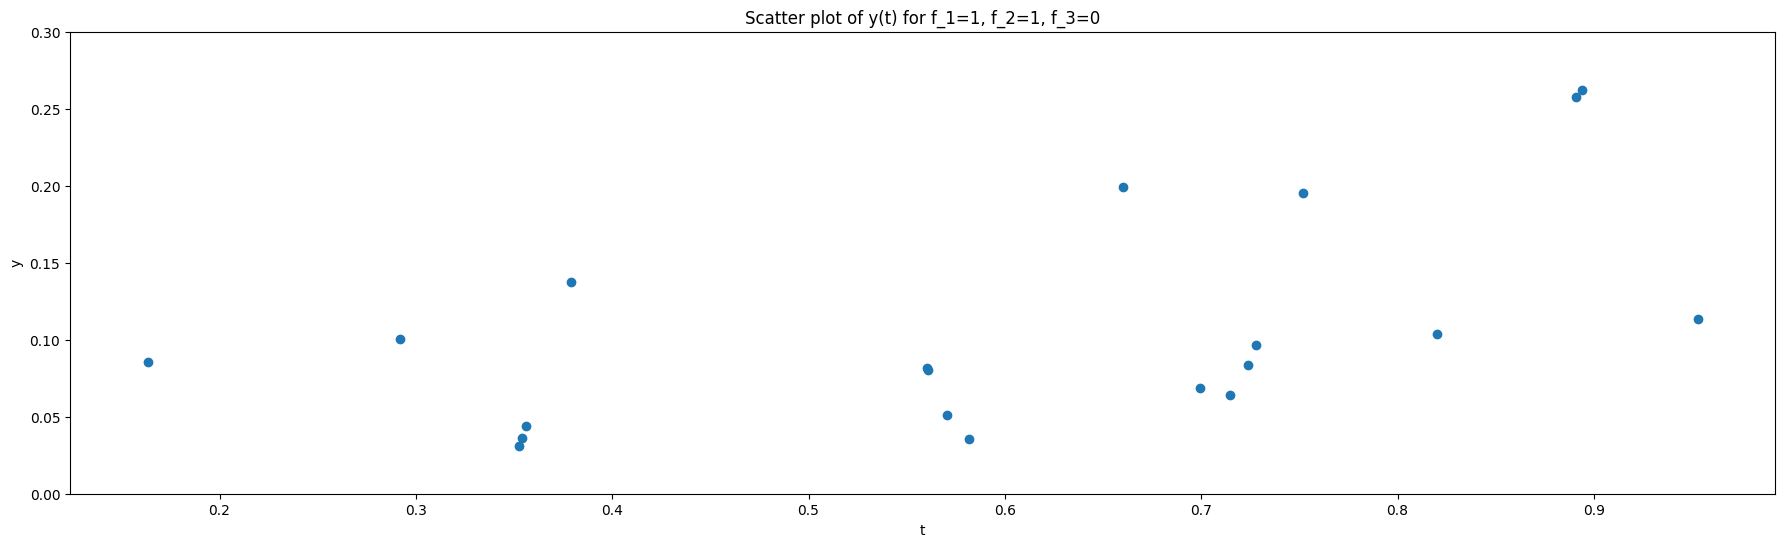

In [48]:
filtered_data = df[(df['f_1'] == 1) & (df['f_2'] == 1) & (df['f_3'] == 0)]
plt.figure(figsize=(22, 6))
plt.scatter(filtered_data['t'], filtered_data['y'])
plt.xlabel('t')
plt.ylabel('y')
plt.ylim(0, 0.3)
plt.title('Scatter plot of y(t) for f_1=1, f_2=1, f_3=0')
plt.show()

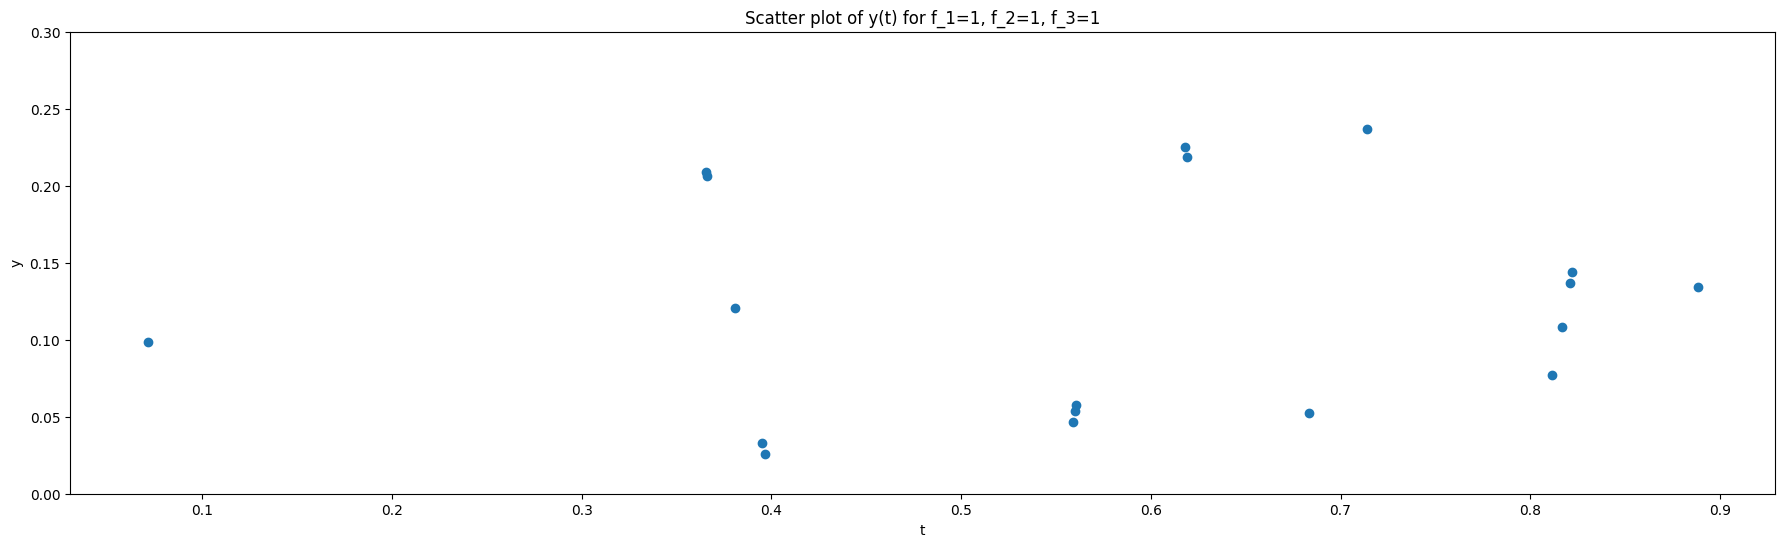

In [49]:
filtered_data = df[(df['f_1'] == 1) & (df['f_2'] == 1) & (df['f_3'] == 1)]
plt.figure(figsize=(22, 6))
plt.scatter(filtered_data['t'], filtered_data['y'])
plt.xlabel('t')
plt.ylabel('y')
plt.ylim(0, 0.3)
plt.title('Scatter plot of y(t) for f_1=1, f_2=1, f_3=1')
plt.show()

/tmp/ipykernel_2598700/3832988388.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab20", max(10, len(groups)))


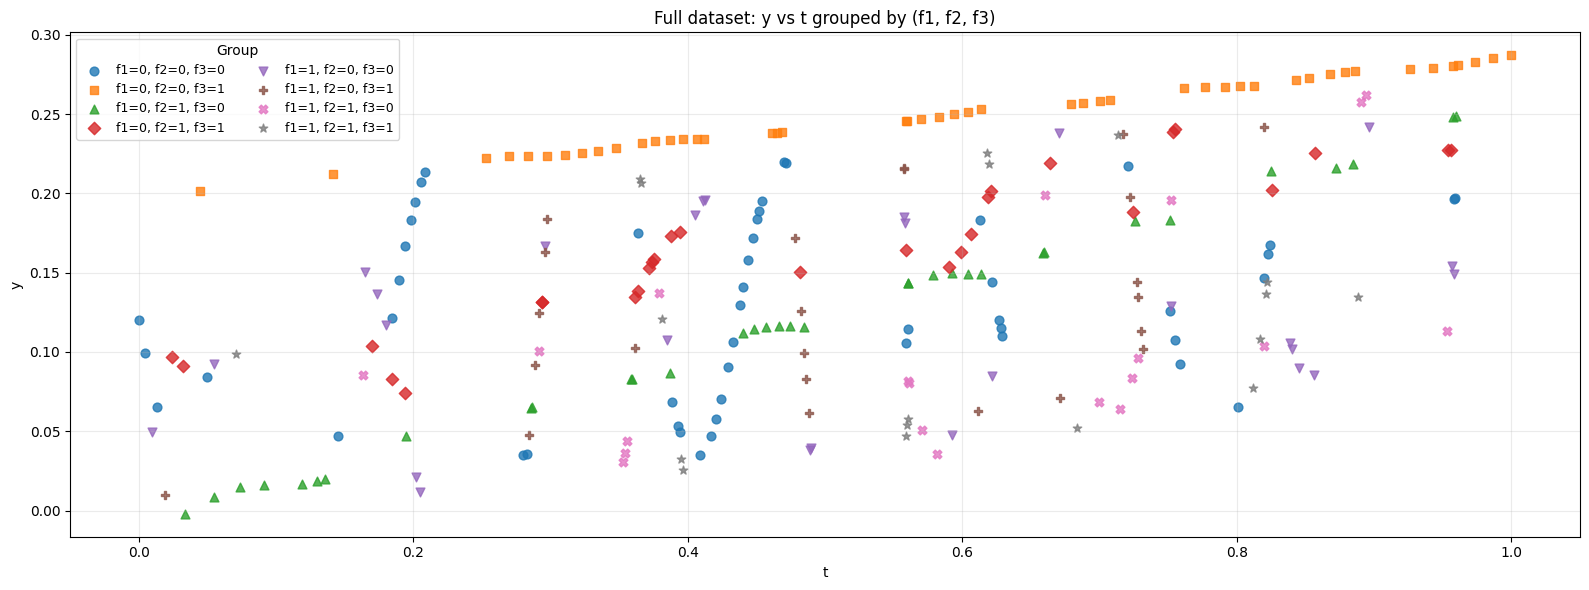

In [52]:
# Build a group label from (f_1, f_2, f_3)
grp_col = "_group_"
df[grp_col] = list(zip(df["f_1"].astype(int),
                       df["f_2"].astype(int),
                       df["f_3"].astype(int)))

groups = sorted(df[grp_col].unique(), key=lambda x: (x[0], x[1], x[2]))
cmap = plt.cm.get_cmap("tab20", max(10, len(groups)))
markers = ["o","s","^","D","v","P","X","*","<",">"]

plt.figure(figsize=(16, 6))
for i, g in enumerate(groups):
    m = df[grp_col] == g
    plt.scatter(
        df.loc[m, "t"], df.loc[m, "y"],
        label=f"f1={g[0]}, f2={g[1]}, f3={g[2]}",
        marker=markers[i % len(markers)],
        s=40,
        alpha=0.8
    )

plt.xlabel("t")
plt.ylabel("y")
plt.title("Full dataset: y vs t grouped by (f1, f2, f3)")
plt.grid(True, alpha=0.25)
plt.legend(ncol=2, fontsize=9, title="Group")
plt.tight_layout()
plt.show()

# (Optional) if you don't want the helper column to remain:
# df.drop(columns=[grp_col], inplace=True)


## Four time-dependant basis functions

### $e_1$ - constant

<Axes: xlabel='t'>

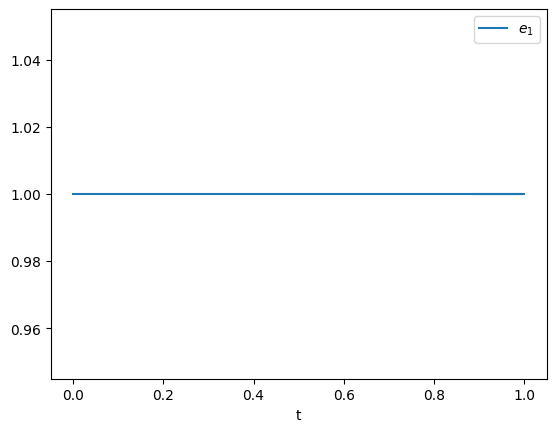

In [56]:
df.plot(x="t", y="e_1", label="$e_1$")

<Axes: xlabel='t'>

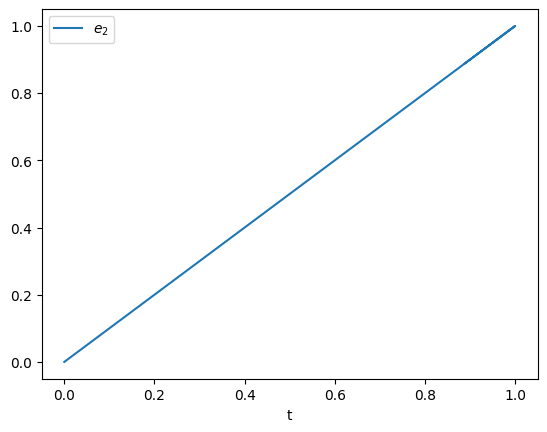

In [57]:
df.plot(x="t", y="e_2", label="$e_2$")

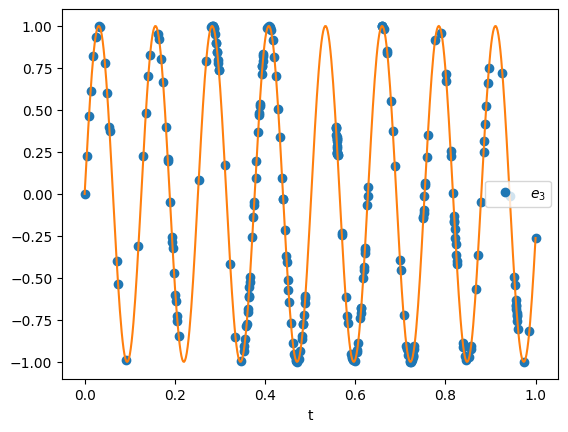

In [75]:
ax=df.sort_values("t").plot(x="t", y="e_3", label="$e_3$", style="o")
x=np.linspace(0, 1, 500)
ax.plot(x, np.sin(50 * x))

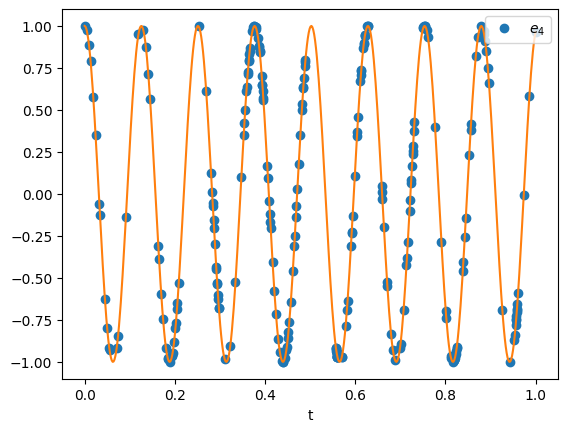

In [77]:
ax=df.sort_values("t").plot(x="t", y="e_4", label="$e_4$", style="o")
ax.plot(x, np.cos(50*x))

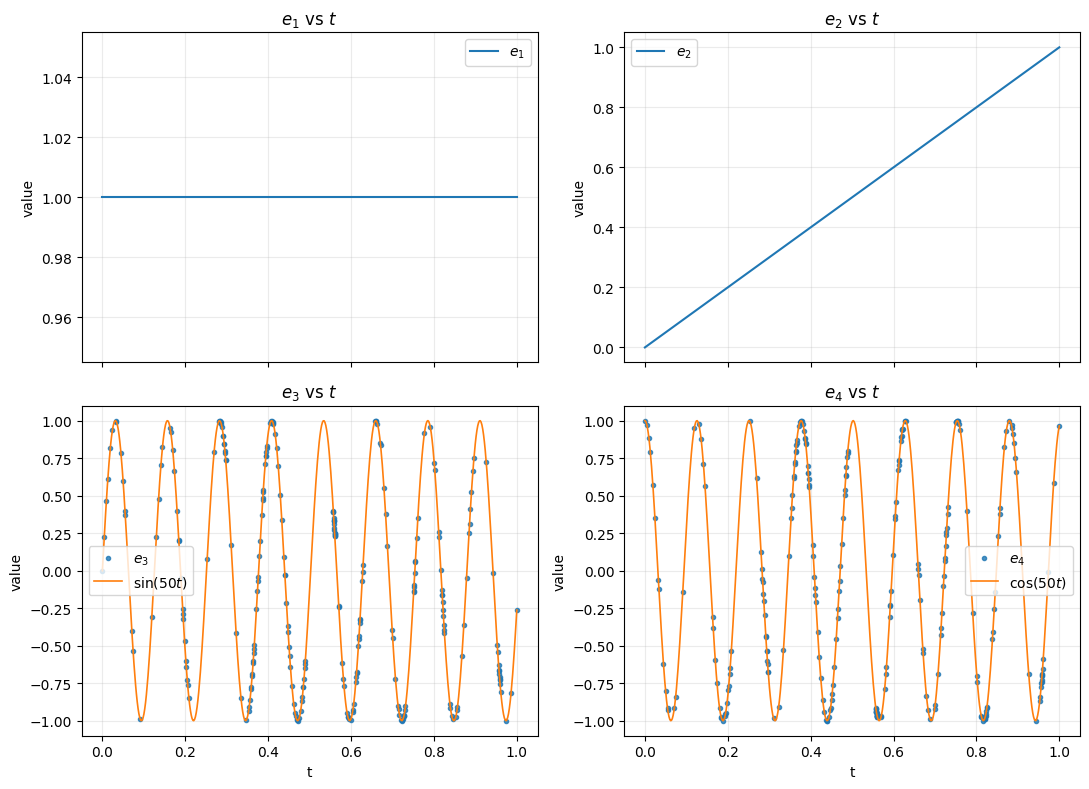

In [87]:
d = df.sort_values("t")
x = np.linspace(d["t"].min(), d["t"].max(), 500)  # use (0,1) if your t is fixed there

fig, axes = plt.subplots(2, 2, figsize=(11, 8), sharex=True)

# (0,0): e1
d.plot(x="t", y="e_1", ax=axes[0, 0], label=r"$e_1$")
axes[0, 0].set_title(r"$e_1$ vs $t$")

# (0,1): e2
d.plot(x="t", y="e_2", ax=axes[0, 1], label=r"$e_2$")
axes[0, 1].set_title(r"$e_2$ vs $t$")

# (1,0): e3 scatter + sin
d.plot(x="t", y="e_3", ax=axes[1, 0], style="o", markersize=3, alpha=0.8, label=r"$e_3$")
axes[1, 0].plot(x, np.sin(50 * x), linewidth=1.2, label=r"$\sin(50t)$")
axes[1, 0].set_title(r"$e_3$ vs $t$")

# (1,1): e4 scatter + cos
d.plot(x="t", y="e_4", ax=axes[1, 1], style="o", markersize=3, alpha=0.8, label=r"$e_4$")
axes[1, 1].plot(x, np.cos(50 * x), linewidth=1.2, label=r"$\cos(50t)$")
axes[1, 1].set_title(r"$e_4$ vs $t$")

for ax in axes.flat:
    ax.grid(True, alpha=0.25)
    ax.legend()
    ax.set_xlabel("t")
    ax.set_ylabel("value")

fig.tight_layout()
plt.show()

## Summary

* we have dataset which is a mix of eight components
* each component is a linear combination of basis functions $[1, t, \sin(50 \cdot t), \cos(50 \cdot t)]$ = $[e_1(t), e_2(t), e_3(t), e_4(t)]$
* each component can be identified using factors $f_1$, $f_2$, $f_3$
* model's task is to group objects together using factors $f_1$, $f_2$, $f_3$ and find weights $A, B, C, D$ for each group such that model's prediction is most accurate in terms of MSE (predicted value is as close as possible to a point in the dataset)
* train/test split goes in this experiment from "past" to the "future": past=$t<0.5$, future=$t\ge0.5$

# Convert to extra format

In [24]:
features_inter_cols = ['f_1', 'f_2', 'f_3']
features_extra_cols = ['e_1', 'e_2', 'e_3', 'e_4']
target_col = 'y'
time_col = 't'

def contiguous(array):
    return np.ascontiguousarray(array, dtype=np.float64)

mask_train = df[time_col] < 0.5
mask_test = ~mask_train

train_features_inter = contiguous(df.loc[mask_train, features_inter_cols].to_numpy())
train_features_extra = contiguous(df.loc[mask_train, features_extra_cols].to_numpy())
train_target = contiguous(df.loc[mask_train, target_col].to_numpy())

test_features_inter = contiguous(df.loc[mask_test, features_inter_cols].to_numpy())
test_features_extra = contiguous(df.loc[mask_test, features_extra_cols].to_numpy())
test_target = contiguous(df.loc[mask_test, target_col].to_numpy())

train_features_inter.shape, test_features_inter.shape

((124, 3), (124, 3))

# Train model

In [83]:
build_shared()

params = BoosterParams(n_stages=1, learning_rate=1.0, max_depth=3, loss='mse')

monitor_datasets = [
    (train_features_inter, train_features_extra, train_target, 'train'),
    (test_features_inter, test_features_extra, test_target, 'test'),
]

booster = ExtraBooster.train(
    train_features_inter,
    train_features_extra,
    train_target,
    params=params,
    monitor_datasets=monitor_datasets,
)

train_predictions = booster.predict(train_features_inter, train_features_extra)
test_predictions = booster.predict(test_features_inter, test_features_extra)


def rmse(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    diff = y_true - y_pred
    return float(np.sqrt(np.mean(diff * diff)))

rmse_train = rmse(train_target, train_predictions)
rmse_test = rmse(test_target, test_predictions)
print(f'Train RMSE: {rmse_train:.6f}')
print(f'Test RMSE: {rmse_test:.6f}')

with tempfile.NamedTemporaryFile(suffix='.json', delete=False) as tmp_file:
    curves_path = Path(tmp_file.name)

booster.dump_learning_curves(curves_path)
with curves_path.open('r', encoding='utf-8') as f:
    learning_curves_payload = json.load(f)
curves_path.unlink(missing_ok=True)

curve_titles = learning_curves_payload.get('Titles', [])
curve_values = np.asarray(learning_curves_payload.get('Values', []), dtype=float)


Train RMSE: 0.000028
Test RMSE: 0.000696


* dataset is synthetic, so one step is enought to get zero (almost) error on it

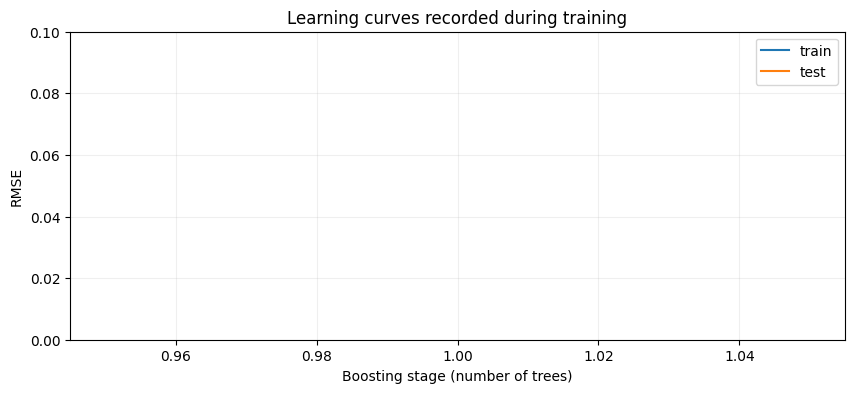

In [84]:
stages = curve_values.shape[0] if curve_values.size else 0
if stages and curve_values.ndim == 2:
    x_axis = np.arange(1, stages + 1)
    plt.figure(figsize=(10, 4))
    titles = curve_titles if curve_titles else [f'dataset_{idx}' for idx in range(curve_values.shape[1])]
    for idx in range(curve_values.shape[1]):
        label = titles[idx] if idx < len(titles) and titles[idx] else f'dataset_{idx}'
        plt.plot(x_axis, curve_values[:, idx], label=label)
    plt.xlabel('Boosting stage (number of trees)')
    plt.ylabel('RMSE')
    plt.title('Learning curves recorded during training')
    plt.grid(True, alpha=0.2)
    plt.legend()
    plt.ylim(0, 0.1)
    plt.show()
else:
    print('Learning curve data not available.')


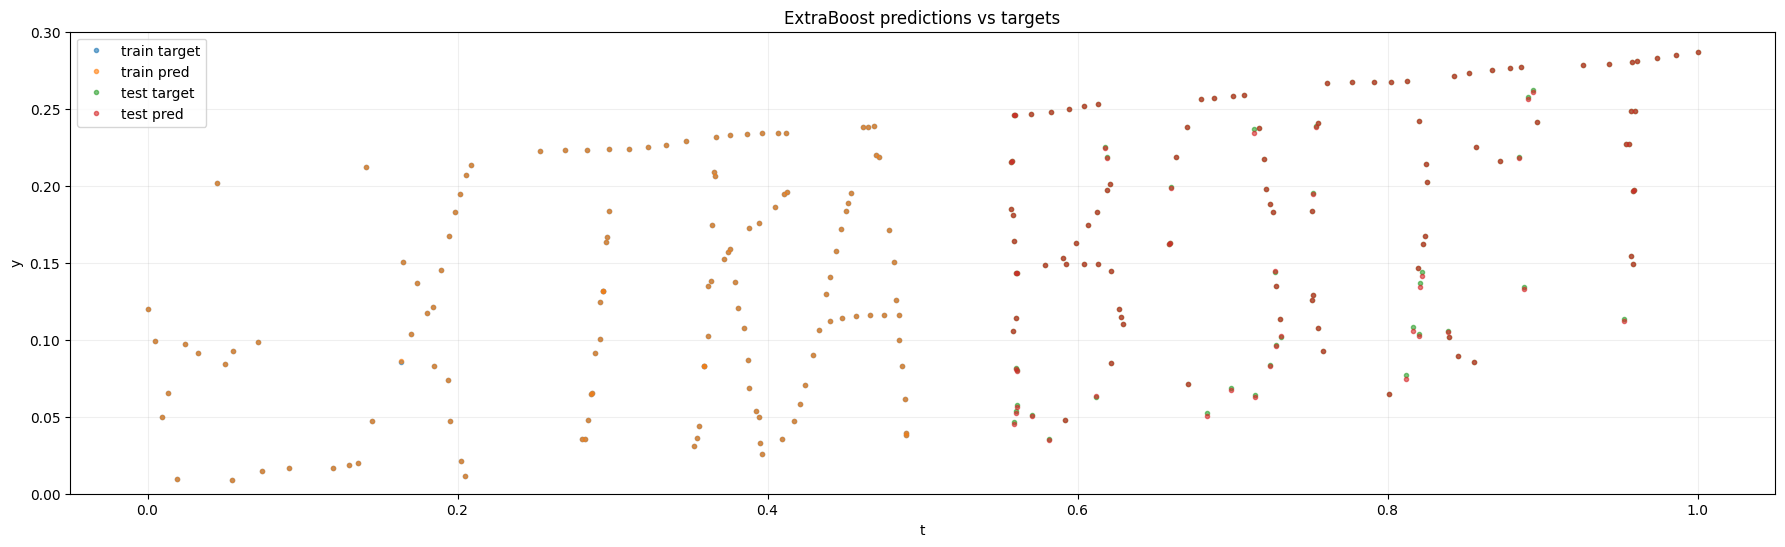

In [86]:
plt.figure(figsize=(22, 6))
plt.plot(df.loc[mask_train, time_col], train_target, '.', label='train target', alpha=0.6)
plt.plot(df.loc[mask_train, time_col], train_predictions, '.', label='train pred', alpha=0.6)
plt.plot(df.loc[mask_test, time_col], test_target, '.', label='test target', alpha=0.6)
plt.plot(df.loc[mask_test, time_col], test_predictions, '.', label='test pred', alpha=0.6)
plt.xlabel('t')
plt.ylabel('y')
plt.title('ExtraBoost predictions vs targets')
plt.legend()
plt.grid(True, alpha=0.2)
plt.ylim(-0.0, 0.3)
plt.show()

booster.close()


# Test by component

## This section was necessary for debug purposes only

* it demonstrates fitting of exactly one component using least squares method and gradient boosted decision trees

In [9]:
from pathlib import Path as _Path

component_bits = (0, 0, 0)
component_path = _Path('../../datasets/mse/component_f000.csv')
df_component = pd.read_csv(component_path)
print(f'Dataset: {component_path} (rows={len(df_component)})')

features_inter_comp = contiguous(df_component[features_inter_cols].to_numpy())
features_extra_comp = contiguous(df_component[features_extra_cols].to_numpy())
target_comp = contiguous(df_component[target_col].to_numpy())

lin_features = df_component[['e_1', 'e_2', 'e_3', 'e_4']].to_numpy(dtype=float)
lin_coeffs, *_ = np.linalg.lstsq(lin_features, target_comp, rcond=None)
lin_predictions = lin_features @ lin_coeffs
lin_rmse = rmse(target_comp, lin_predictions)
print('Linear regression coefficients (bias, t, sin(kt), cos(kt)):')
for idx, value in enumerate(lin_coeffs):
    print(f'  w{idx}: {value:.9f}')
print(f'Linear regression RMSE: {lin_rmse:.9e}')

component_booster = ExtraBooster.train(
    features_inter_comp,
    features_extra_comp,
    target_comp,
    params=BoosterParams(n_stages=1, learning_rate=1.0, max_depth=1, loss='mse'),
    monitor_datasets=[(features_inter_comp, features_extra_comp, target_comp, 'component')],
)
boost_predictions = component_booster.predict(features_inter_comp, features_extra_comp)
boost_rmse = rmse(target_comp, boost_predictions)
print(f'ExtraBoost RMSE: {boost_rmse:.9e}')


Dataset: ../../datasets/mse/component_f000.csv (rows=50)
Linear regression coefficients (bias, t, sin(kt), cos(kt)):
  w0: 0.131401920
  w1: -0.009956936
  w2: -0.092642986
  w3: -0.011336778
Linear regression RMSE: 2.597705399e-16
ExtraBoost RMSE: 7.982259236e-07


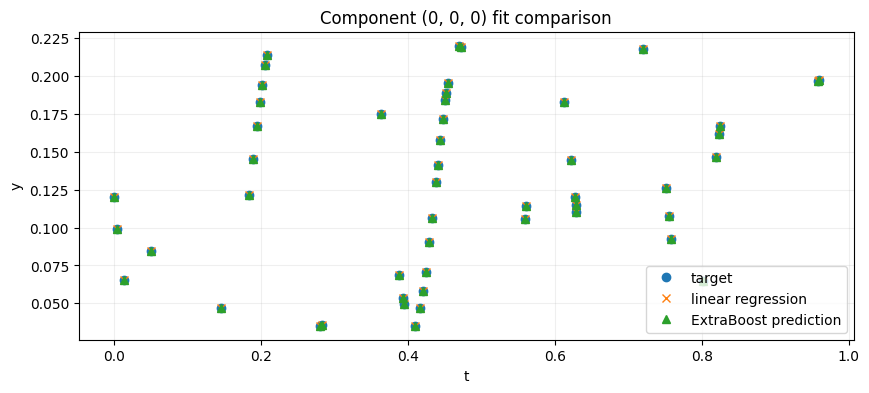

In [10]:
plt.figure(figsize=(10, 4))
plt.plot(df_component[time_col], target_comp, 'o', label='target')
plt.plot(df_component[time_col], lin_predictions, 'x', label='linear regression')
plt.plot(df_component[time_col], boost_predictions, '^', label='ExtraBoost prediction')
plt.xlabel('t')
plt.ylabel('y')
plt.title(f'Component {component_bits} fit comparison')
plt.legend()
plt.grid(True, alpha=0.2)
plt.show()

component_booster.close()


## Filtering a Single Component

Select only the records belonging to a single greedy component (three-bit code) to inspect how well the model fits a pure sinusoidal fragment.

In [11]:
from pathlib import Path as _Path

component_path = _Path('../../datasets/mse/component_f000.csv')
df_component = pd.read_csv(component_path)
print(f'Dataset: {component_path} (rows={len(df_component)})')

features_inter_comp = contiguous(df_component[features_inter_cols].to_numpy())
features_extra_comp = contiguous(df_component[features_extra_cols].to_numpy())
target_comp = contiguous(df_component[target_col].to_numpy())

lin_features = df_component[['e_1', 'e_2', 'e_3', 'e_4']].to_numpy(dtype=float)
lin_coeffs, *_ = np.linalg.lstsq(lin_features, target_comp, rcond=None)
lin_predictions = lin_features @ lin_coeffs
lin_rmse = rmse(target_comp, lin_predictions)
print('Linear regression coefficients (bias, t, sin, cos):')
for idx, value in enumerate(lin_coeffs):
    print(f'  w{idx}: {value:.9f}')
print(f'Linear regression RMSE: {lin_rmse:.9e}')

component_booster = ExtraBooster.train(
    features_inter_comp,
    features_extra_comp,
    target_comp,
    params=BoosterParams(n_stages=1, learning_rate=1.0, max_depth=1, loss='mse'),
    monitor_datasets=[(features_inter_comp, features_extra_comp, target_comp, 'component')],
)
boost_predictions = component_booster.predict(features_inter_comp, features_extra_comp)
boost_rmse = rmse(target_comp, boost_predictions)
print(f'ExtraBoost RMSE: {boost_rmse:.9e}')



Dataset: ../../datasets/mse/component_f000.csv (rows=50)
Linear regression coefficients (bias, t, sin, cos):
  w0: 0.131401920
  w1: -0.009956936
  w2: -0.092642986
  w3: -0.011336778
Linear regression RMSE: 2.597705399e-16
ExtraBoost RMSE: 7.982259236e-07


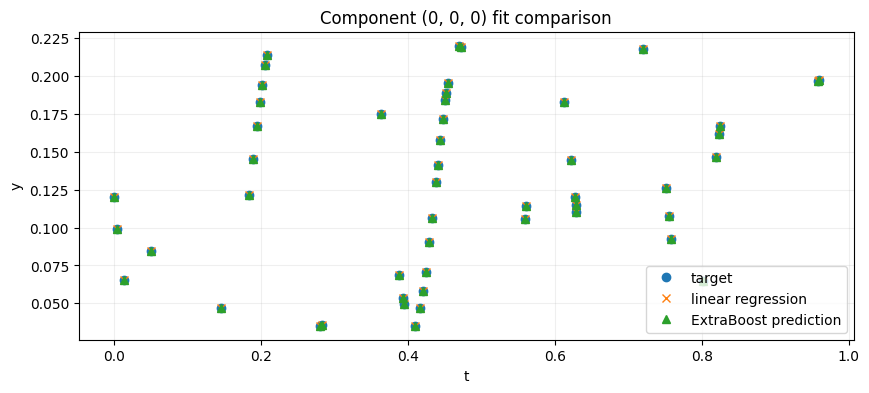

In [12]:
plt.figure(figsize=(10, 4))
plt.plot(df_component[time_col], target_comp, 'o', label='target')
plt.plot(df_component[time_col], lin_predictions, 'x', label='linear regression')
plt.plot(df_component[time_col], boost_predictions, '^', label='ExtraBoost prediction')
plt.xlabel('t')
plt.ylabel('y')
plt.title(f'Component {component_bits} fit comparison')
plt.legend()
plt.grid(True, alpha=0.2)
plt.show()

component_booster.close()


# Check basis

<Axes: xlabel='t', ylabel='e_4'>

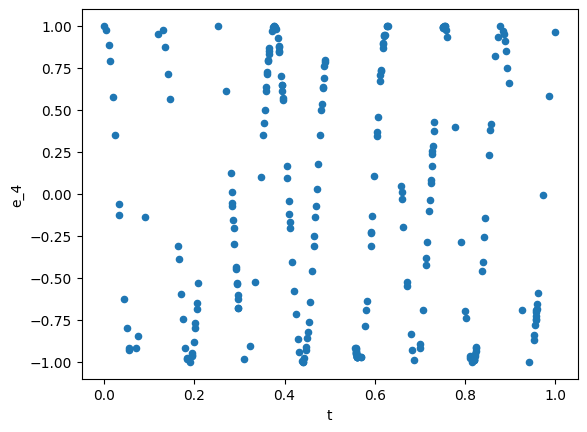

In [13]:
df.plot(x="t", y="e_4", kind="scatter")